# Imports

In [1]:
# install additional packages if running on Emscripten
import platform

notebook_platform = platform.uname()
if notebook_platform.system == "Emscripten":
    import piplite

    await piplite.install(["openpyxl", "seaborn"])

In [2]:
from enum import Enum
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import numpy as np

sns.set_style("ticks", {"axes.grid": True})

# Data

In [3]:
this_file = pathlib.Path().absolute()
data_dir = this_file.parent / "data"
data_dir

WindowsPath('c:/Users/Legion/workspace/tld_let_calibration/data')

## Calibrations

In [4]:
df_parisi_calib = pd.read_csv(data_dir / "interim" / "parisi_calib.csv")
df_parisi_calib

,ratio,dLETProtons,tLETProtons
0,0.96,0.452197,0.202186
1,0.97,0.474422,0.224410
2,0.98,0.496647,0.241712
3,0.99,0.518872,0.258689
4,1.00,0.543276,0.287458
...,...,...,...
200,2.96,19.922015,14.998701
201,2.97,20.113833,15.157980
202,2.98,20.305651,15.343213
203,2.99,20.522887,15.571846


In [5]:
df_ifj_calib = pd.read_csv(data_dir / "interim" / "ifj_calib.csv")

In [6]:
df_ifj_calib_data = pd.read_csv(data_dir / "interim" / "ifj_calib_data.csv")
# df_ifj_calib_data[["ratio","ratio_err","dLETPrimaries","dLETProtons","dLETAll","tLETPrimaries","tLETProtons","tLETAll"]].drop_duplicates().reset_index(drop=True)

In [7]:
with pd.ExcelWriter(data_dir / "interim" / "ifj_calib_data.xlsx") as writer:
    df_ifj_calib.to_excel(writer, index=False, sheet_name="dense")
    df_ifj_calib_data[
        ["ratio", "ratio_err", "dLETPrimaries", "dLETProtons", "dLETAll", "tLETPrimaries", "tLETProtons", "tLETAll"]
    ].drop_duplicates().reset_index(drop=True).to_excel(writer, index=False, sheet_name="data")

Text(0, 0.5, 'dLET (keV/um)')

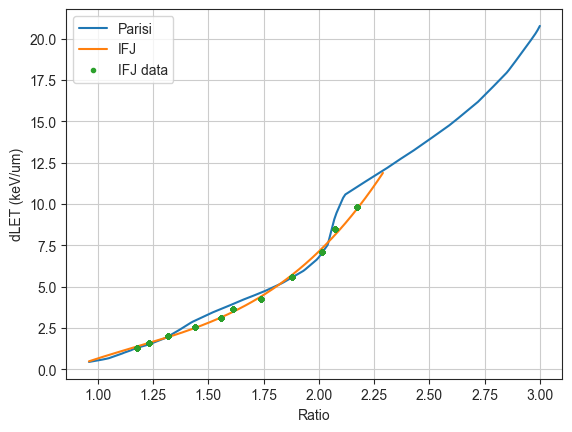

In [8]:
fig, ax = plt.subplots()
ax.plot(df_parisi_calib.ratio, df_parisi_calib.dLETProtons, label="Parisi")
ax.plot(df_ifj_calib.ratio, df_ifj_calib.dLETProtons, label="IFJ")
ax.plot(df_ifj_calib_data.ratio, df_ifj_calib_data.dLETProtons, label="IFJ data", marker=".", linestyle="None")
ax.legend()
ax.set_xlabel("Ratio")
ax.set_ylabel("dLET (keV/um)")

Text(0, 0.5, 'tLET (keV/um)')

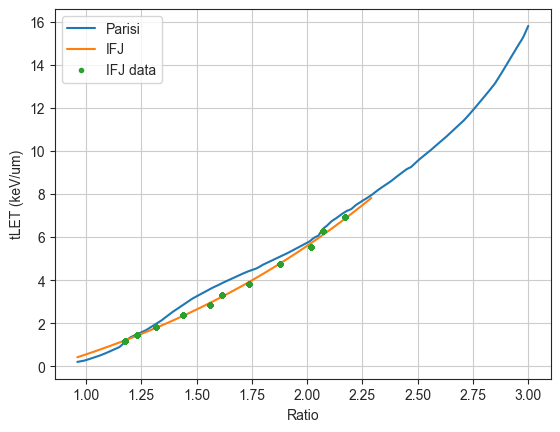

In [9]:
fig, ax = plt.subplots()
ax.plot(df_parisi_calib.ratio, df_parisi_calib.tLETProtons, label="Parisi")
ax.plot(df_ifj_calib.ratio, df_ifj_calib.tLETProtons, label="IFJ")
ax.plot(df_ifj_calib_data.ratio, df_ifj_calib_data.tLETProtons, label="IFJ data", marker=".", linestyle="None")
ax.legend()
ax.set_xlabel("Ratio")
ax.set_ylabel("tLET (keV/um)")

In [10]:
df_mc_dcpt = pd.DataFrame(
    {"exp": ["1a", "1b", "1c", "2a"], "LETf_p": [1.14, 4.39, 5.68, 0.58], "LETd_p": [2.01, 7.55, 10.1, 0.9]}
)
df_mc_dcpt

,exp,LETf_p,LETd_p
0,1a,1.14,2.01
1,1b,4.39,7.55
2,1c,5.68,10.10
3,2a,0.58,0.90


(0.0, 12.0)

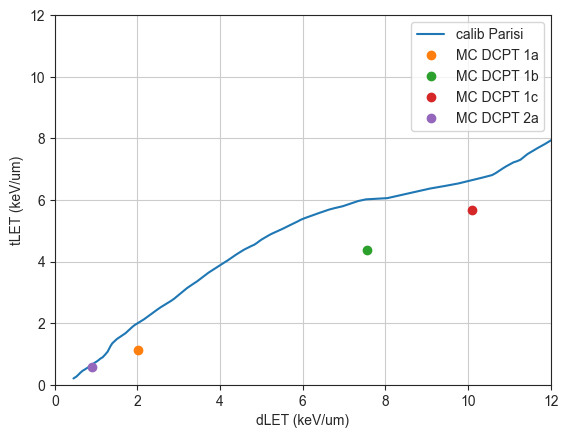

In [11]:
fig, ax = plt.subplots()
ax.plot(df_parisi_calib.dLETProtons, df_parisi_calib.tLETProtons, label="calib Parisi")
# ax.plot(df_ifj_calib.tLETProtons, df_ifj_calib.dLETProtons, label="calib IFJ")
for row in df_mc_dcpt.itertuples():
    ax.plot(row.LETd_p, row.LETf_p, label=f"MC DCPT {row.exp}", marker="o", linestyle="None")
ax.legend()
ax.set_xlabel("dLET (keV/um)")
ax.set_ylabel("tLET (keV/um)")
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)